In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw_push_stat_2022_01_13_', sep=';')
df = df.drop_duplicates().reset_index(drop=True)

In [3]:
df.head()

user_id content_id  push_opened            push_time     push_opened_time  \
0  81SPHM0     ERCW5L            1  2021-12-12 16:02:44  2021-12-12 17:42:10   
1  61MBDYJ     OIJS0L            0  2021-12-12 02:10:25  2021-12-12 02:10:25   
2  XASX8WK     73VCE3            0  2021-12-13 14:09:39  2021-12-13 14:09:39   
3  3X21SGG     OBJJ9I            0  2021-12-14 14:01:05  2021-12-14 14:01:05   
4  RWJEWYC     CIMG1L            0  2021-12-14 02:03:54  2021-12-14 02:03:54   

             create_at content_type  
0  2021-04-19 21:37:55          pic  
1  2021-02-26 01:36:28          pic  
2  2021-01-22 05:45:46          pic  
3  2021-12-14 04:31:01          pic  
4  2020-12-18 00:30:30          pic

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211058 entries, 0 to 2211057
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   content_id        object
 2   push_opened       int64 
 3   push_time         object
 4   push_opened_time  object
 5   create_at         object
 6   content_type      object
dtypes: int64(1), object(6)
memory usage: 118.1+ MB


In [5]:
print (f"n_users {df['user_id'].nunique()}")
print (f"n_items {df['content_id'].nunique()}")

n_users 992236
n_items 818


In [6]:
df.content_id.value_counts(normalize=True).reset_index().head(30)

index  content_id
0   UWKBTR    0.046350
1   S0DEF2    0.046333
2   GUG3HF    0.046292
3   CIMG1L    0.046143
4   ZT3F2B    0.046044
5   1J1MY6    0.046019
6   BBTCKP    0.045989
7   AG252T    0.045987
8   PB1WDP    0.045923
9   KULNUP    0.045860
10  OIJS0L    0.045736
11  612X25    0.045585
12  F318V6    0.045563
13  ERCW5L    0.045556
14  EBSTP9    0.045289
15  CLOZWX    0.045270
16  FYIAIU    0.045247
17  TOKBQO    0.045220
18  OBJJ9I    0.045139
19  73VCE3    0.045129
20  1CJLFX    0.045104
21  L7O3CI    0.001607
22  L93BQQ    0.000552
23  BEOIB8    0.000285
24  HOBDF2    0.000280
25  G1Z8AC    0.000280
26  MZ6F1C    0.000279
27  YNNXG1    0.000277
28  X2IERA    0.000277
29  IF31OI    0.000276

Интересно, что есть 21 наиболее частых мемов, а дальше резкое падение

In [7]:
df.content_id.value_counts(normalize=False).reset_index().head(30)

index  content_id
0   UWKBTR      102482
1   S0DEF2      102446
2   GUG3HF      102355
3   CIMG1L      102025
4   ZT3F2B      101806
5   1J1MY6      101751
6   BBTCKP      101684
7   AG252T      101679
8   PB1WDP      101538
9   KULNUP      101400
10  OIJS0L      101125
11  612X25      100790
12  F318V6      100742
13  ERCW5L      100727
14  EBSTP9      100137
15  CLOZWX      100095
16  FYIAIU      100044
17  TOKBQO       99985
18  OBJJ9I       99804
19  73VCE3       99783
20  1CJLFX       99728
21  L7O3CI        3553
22  L93BQQ        1220
23  BEOIB8         630
24  HOBDF2         620
25  G1Z8AC         619
26  MZ6F1C         616
27  YNNXG1         613
28  X2IERA         612
29  IF31OI         611

In [8]:
df.content_id.value_counts(normalize=True).reset_index().tail(5)

index    content_id
813  Q5VGE8  4.522722e-07
814  XDRCHC  4.522722e-07
815  0ASP5O  4.522722e-07
816  Q24EZI  4.522722e-07
817  JCUWFA  4.522722e-07

In [9]:
df.content_type.value_counts(normalize=False)

pic                2210346
caption                703
video_clip_user          8
gif                      1
Name: content_type, dtype: int64

### Гистограмма по часам

In [10]:
dt_seria = pd.to_datetime(df.push_time)

In [11]:
df['push_hour'] = dt_seria.dt.hour
df['push_dayofweek'] = dt_seria.dt.dayofweek

In [12]:
df

user_id content_id  push_opened            push_time  \
0        81SPHM0     ERCW5L            1  2021-12-12 16:02:44   
1        61MBDYJ     OIJS0L            0  2021-12-12 02:10:25   
2        XASX8WK     73VCE3            0  2021-12-13 14:09:39   
3        3X21SGG     OBJJ9I            0  2021-12-14 14:01:05   
4        RWJEWYC     CIMG1L            0  2021-12-14 02:03:54   
...          ...        ...          ...                  ...   
2211053  RTF4HAC     612X25            0  2021-12-14 23:05:43   
2211054  4MAOZLR     73VCE3            0  2021-12-13 15:07:23   
2211055  HXCRGPX     EBSTP9            0  2021-12-14 18:03:37   
2211056  LTB278E     ERCW5L            0  2021-12-12 16:16:00   
2211057  A8SITW7     73VCE3            0  2021-12-13 14:01:12   

            push_opened_time            create_at content_type  push_hour  \
0        2021-12-12 17:42:10  2021-04-19 21:37:55          pic         16   
1        2021-12-12 02:10:25  2021-02-26 01:36:28          pic          2   
2        2021-12-13 14:09:39  2021-01-22 05:45:46          pic         14   
3        2021-12-14 14:01:05  2021-12-14 04:31:01          pic         14   
4        2021-12-14 02:03:54  2020-12-18 00:30:30          pic          2   
...                      ...                  ...          ...        ...   
2211053  2021-12-14 23:05:43  2021-03-19 18:52:01          pic         23   
2211054  2021-12-13 15:07:23  2021-01-22 05:45:46          pic         15   
2211055  2021-12-14 18:03:37  2021-12-14 11:16:34          pic         18   
2211056  2021-12-12 16:16:00  2021-04-19 21:37:55          pic         16   
2211057  2021-12-13 14:01:12  2021-01-22 05:45:46          pic         14   

         push_dayofweek  
0                     6  
1                     6  
2                     0  
3                     1  
4                     1  
...                 ...  
2211053               1  
2211054               0  
2211055               1  
2211056               6  
2211057               0  

[2211058 rows x 9 columns]

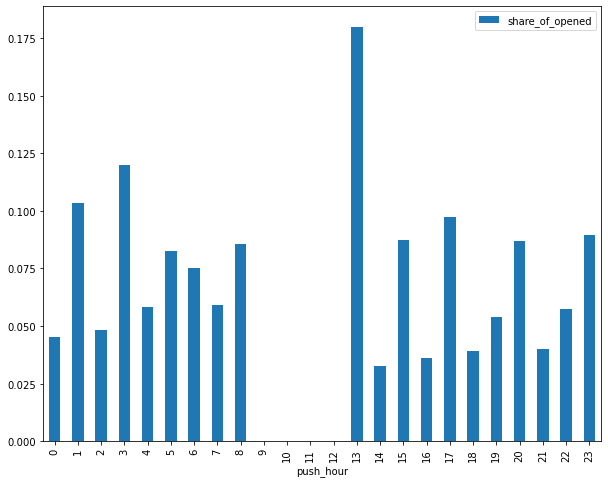

In [13]:
push_stat = (
    df
    .groupby('push_hour')
    .agg({'push_opened': 'sum', 'user_id': 'count'})
    .reset_index()
    .rename(columns={'push_opened': 'number_of_opened', 'user_id': 'number_of_pushes'})
)
push_stat['share_of_opened'] = push_stat['number_of_opened'] / push_stat['number_of_pushes']

(
    push_stat
    .plot(x='push_hour', y='share_of_opened', kind='bar', figsize=(10, 8))
)
plt.show()

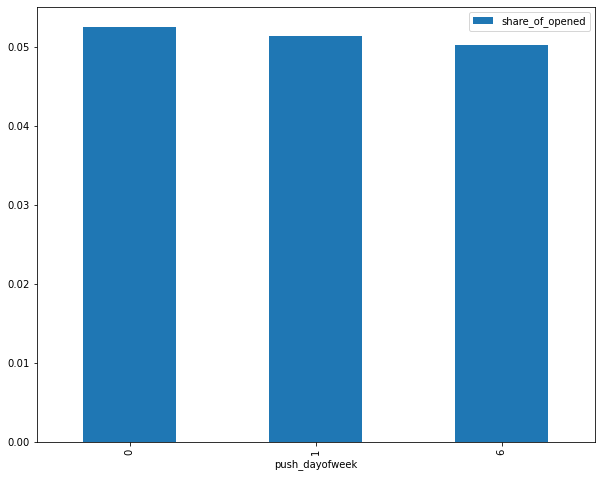

In [14]:
push_stat = (
    df
    .groupby('push_dayofweek')
    .agg({'push_opened': 'sum', 'user_id': 'count'})
    .reset_index()
    .rename(columns={'push_opened': 'number_of_opened', 'user_id': 'number_of_pushes'})
)
push_stat['share_of_opened'] = push_stat['number_of_opened'] / push_stat['number_of_pushes']

(
    push_stat
    .plot(x='push_dayofweek', y='share_of_opened', kind='bar', figsize=(10, 8))
)
plt.show()

In [15]:
dt_seria.dt.date.unique()

array([datetime.date(2021, 12, 12), datetime.date(2021, 12, 13),
       datetime.date(2021, 12, 14)], dtype=object)

### Experiments

In [16]:
import datetime
df_train = df[dt_seria.dt.date == datetime.datetime(2021, 12, 12).date()].reset_index(drop=True)
df_val = df[dt_seria.dt.date == datetime.datetime(2021, 12, 13).date()].reset_index(drop=True)
df_test = df[dt_seria.dt.date == datetime.datetime(2021, 12, 14).date()].reset_index(drop=True)

In [17]:
print(f'train size: {df_train.shape[0]}, val size {df_val.shape[0]}, test size {df_test.shape[0]}')

train size: 740378, val size 735320, test size 735360


In [18]:
# feature generation
def get_features_and_target(df: pd.DataFrame):
    df.loc[:, 'push_hour'] = pd.to_datetime(df['push_time']).dt.hour
    df.loc[:, 'content_lifetime'] = (pd.to_datetime(df['push_time']) - pd.to_datetime(df['create_at'])).dt.days
    
    return df[['user_id', 'push_hour', 'content_lifetime', 'content_type', 'push_opened']]

In [19]:
df_train = get_features_and_target(df_train)
df_val = get_features_and_target(df_val)
df_test = get_features_and_target(df_test)

In [20]:
df_train

user_id  push_hour  content_lifetime content_type  push_opened
0       81SPHM0         16               236          pic            1
1       61MBDYJ          2               289          pic            0
2       Q0I8YJ6         21               231          pic            0
3       H37QOWM          0               359          pic            0
4       JFAYCZO         18               415          pic            0
...         ...        ...               ...          ...          ...
740373  TOBNLCT         15                 0          pic            0
740374  KF5HCDM          2               289          pic            0
740375  15WNKMS         16               236          pic            0
740376  9IS8AXN          4               360          pic            0
740377  LTB278E         16               236          pic            0

[740378 rows x 5 columns]

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [22]:
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

data_pipeline = ColumnTransformer([
    ('numerical', scaler, ['push_hour', 'content_lifetime']),
    ('categorical', encoder, ['content_type'])
])

In [23]:
log_reg = LogisticRegression(random_state=0)
pipeline = Pipeline([
    ('data_pipeline', data_pipeline),
    ('model', log_reg)
])

In [24]:
from typing import List
def search_best_reg_value(df_train: pd.DataFrame, df_val: pd.DataFrame, pipeline: Pipeline, reg_values: List[float]):
    scores = []
    
    model_step_id = 0
    
    for idx, step in enumerate(pipeline.steps):
        if step[0] == 'model':
            model_step_id = idx
    for reg_value in reg_values:
        pipeline.steps[model_step_id][1].C = reg_value
        pipeline.fit(df_train, df_train['push_opened'])
        preds = pipeline.predict_proba(df_val)[:, 1]
        score = roc_auc_score(df_val['push_opened'].values, preds)
        scores.append((score, reg_value))
        
    _, best_value = max(scores, key=lambda x: x[0])
    
    return best_value, scores

In [25]:
search_best_reg_value(df_train, df_val, pipeline, [0.01, 0.1, 1., 10., 100.])

(10.0,
 [(0.5272714704818899, 0.01),
  (0.5274616626633426, 0.1),
  (0.5274640402745046, 1.0),
  (0.5274656294303378, 10.0),
  (0.527465367182592, 100.0)])

In [26]:
df_train = pd.concat([df_train, df_val], ignore_index=True)
pipeline.steps[1][1].C = 10.
pipeline.fit(df_train, df_train['push_opened'].values)

Pipeline(steps=[('data_pipeline',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['push_hour',
                                                   'content_lifetime']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['content_type'])])),
                ('model', LogisticRegression(C=10.0, random_state=0))])

In [27]:
def predict_best_hour(df_test: pd.DataFrame, pipeline: Pipeline):
    preds = pipeline.predict_proba(df_test)[:, 1]
    df_test['pred'] = preds
    
    best_hour = (
        df_test
        .sort_values(['user_id', 'pred'], ascending=[True, False])
        .groupby('user_id')['push_hour']
        .apply(lambda x: x.values[0])
        .reset_index()
        .rename(columns={'push_hour': 'best_push_hour'})
    )
    
    return best_hour

In [28]:
predict_best_hour(df_test, pipeline)

user_id  best_push_hour
0       0001NZ0               2
1       0002KP2              14
2       0006KBA              14
3       000LPHR              16
4       000NNPS               4
...         ...             ...
554333  ZZZNR9R              18
554334  ZZZRZUU              14
554335  ZZZWHU1              16
554336  ZZZWMEO               2
554337  ZZZXW3N               4

[554338 rows x 2 columns]